# Flight Price Prediction

# Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df_train1=pd.read_csv('flight_train.csv')

In [3]:
df_train1.sample()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6758,Jet Airways,9/05/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,09:40,04:25 10 May,18h 45m,2 stops,No info,15129


In [4]:
df_train1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_train1.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
df_train1.shape

(10683, 11)

In [7]:
df_train1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


info() function shows us that there are 10 columns of object variables and 1 column of integer variable.So now we are going to remove the unneccessary column and to convert the object to integer columns wherever it is required

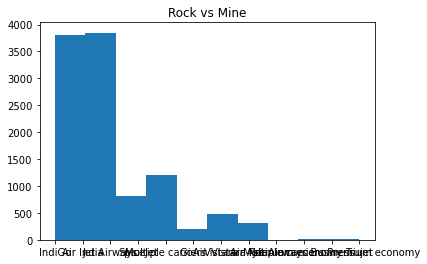

In [9]:
df_train1['Airline'].hist(grid=False)
plt.title('Rock vs Mine')
plt.show()

In [10]:
df_train1['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [11]:
df_train=df_train1.drop(['Additional_Info','Total_Stops','Arrival_Time','Dep_Time','Route','Destination','Source'
               ,'Date_of_Journey'],axis=1)

In [12]:
df_train['Duration2']=(pd.to_timedelta(df_train['Duration']).dt.seconds // 60).astype(str) + 'm'

In [13]:
df_train.head()

,Airline,Duration,Price,Duration2
0,IndiGo,2h 50m,3897,170m
1,Air India,7h 25m,7662,445m
2,Jet Airways,19h,13882,1140m
3,IndiGo,5h 25m,6218,325m
4,IndiGo,4h 45m,13302,285m


In [14]:
df=df_train.drop('Duration',axis=1)

In [15]:
df

,Airline,Price,Duration2
0,IndiGo,3897,170m
1,Air India,7662,445m
2,Jet Airways,13882,1140m
3,IndiGo,6218,325m
4,IndiGo,13302,285m
...,...,...,...
10678,Air Asia,4107,150m
10679,Air India,4145,155m
10680,Jet Airways,7229,180m
10681,Vistara,12648,160m


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Airline    10683 non-null  object
 1   Price      10683 non-null  int64 
 2   Duration2  10683 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.5+ KB


In [17]:
df.dtypes

Airline      object
Price         int64
Duration2    object
dtype: object

In [18]:
df.dtypes

Airline      object
Price         int64
Duration2    object
dtype: object

It will make so complicated when we work for data outliers.Therefore lets  remove

In [19]:
df.dtypes

Airline      object
Price         int64
Duration2    object
dtype: object

In [20]:
df

,Airline,Price,Duration2
0,IndiGo,3897,170m
1,Air India,7662,445m
2,Jet Airways,13882,1140m
3,IndiGo,6218,325m
4,IndiGo,13302,285m
...,...,...,...
10678,Air Asia,4107,150m
10679,Air India,4145,155m
10680,Jet Airways,7229,180m
10681,Vistara,12648,160m


 Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()
df['Airline']=le.fit_transform(df['Airline'])


In [23]:
df['Airline'].value_counts()

4     3849
3     2053
1     1752
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64

In [24]:
le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11])

array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
       'Vistara', 'Vistara Premium economy'], dtype=object)

In [25]:
df['Duration2']=df['Duration2'].str.replace('m','')

In [26]:
df

,Airline,Price,Duration2
0,3,3897,170
1,1,7662,445
2,4,13882,1140
3,3,6218,325
4,3,13302,285
...,...,...,...
10678,0,4107,150
10679,1,4145,155
10680,4,7229,180
10681,10,12648,160


In [27]:
df.dtypes

Airline       int32
Price         int64
Duration2    object
dtype: object

In [28]:
df['Duration2']=df['Duration2'].astype('int')

In [29]:
df.dtypes

Airline      int32
Price        int64
Duration2    int32
dtype: object

Therefore all the columns has been treated and converted from object to integer column.now we can proceed with further steps

In [30]:
df.rename(columns={'Duration2':'Duration(mins)'},inplace=True)

In [31]:
df

,Airline,Price,Duration(mins)
0,3,3897,170
1,1,7662,445
2,4,13882,1140
3,3,6218,325
4,3,13302,285
...,...,...,...
10678,0,4107,150
10679,1,4145,155
10680,4,7229,180
10681,10,12648,160


# Visualization

In [37]:
%matplotlib inline

(0.0, 83399.65)

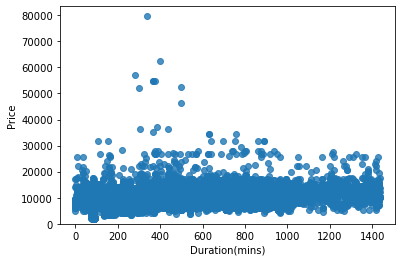

In [33]:
sns.regplot(x='Duration(mins)',y='Price',data=df)
plt.ylim(0,)

(0.0, 83399.65)

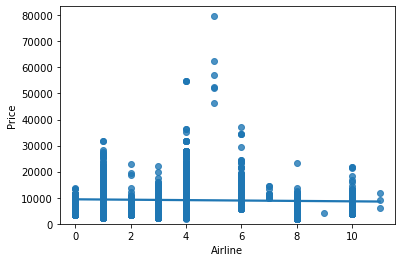

In [34]:
sns.regplot(x='Airline',y='Price',data=df)
plt.ylim(0,)

Text(0, 0.5, 'Price')

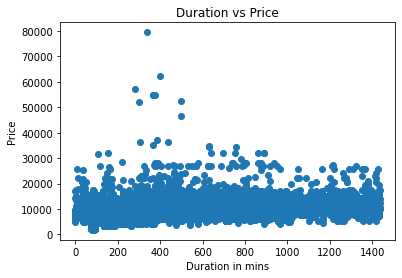

In [36]:
x=df['Duration(mins)']
y=df['Price']
plt.scatter(x,y)
plt.title('Duration vs Price')
plt.xlabel('Duration in mins')
plt.ylabel('Price')

There is an increase in price between the duration 200 mins to 600 mins

<AxesSubplot:xlabel='Airline', ylabel='Price'>

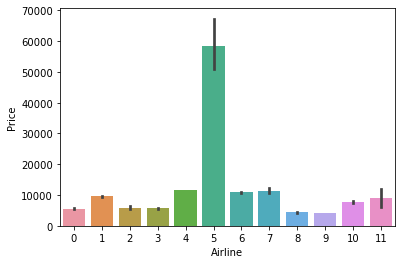

In [38]:
sns.barplot(x='Airline',y='Price',data=df)

Which shows that number 5 which is 'Jet Airways business flight' costs more for the passenger than the other flights

<AxesSubplot:xlabel='Airline', ylabel='Price'>

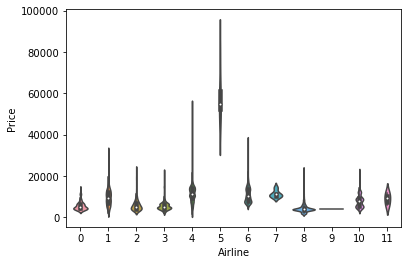

In [43]:
sns.violinplot(x='Airline',y='Price',data=df)

<AxesSubplot:xlabel='Duration(mins)', ylabel='Price'>

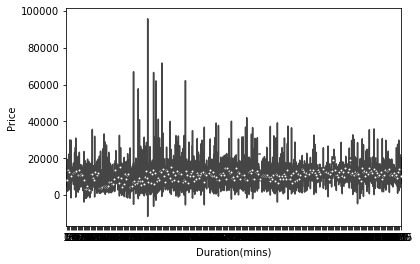

In [44]:
sns.violinplot(x='Duration(mins)',y='Price',data=df)

In [48]:
#Statistical Summary
df.describe()

,Airline,Price,Duration(mins)
count,10683.000000,10683.000000,10683.000000
mean,3.965927,9087.064121,492.124403
std,2.352155,4611.359167,383.070347
min,0.000000,1759.000000,0.000000
25%,3.000000,5277.000000,165.000000
50%,4.000000,8372.000000,380.000000
75%,4.000000,12373.000000,755.000000
max,11.000000,79512.000000,1435.000000


We can see that total number of counts is 10683 and mean is 9087 for price column and 492 for duration
columns. Minimum price value is 1759 and minimum duration the passenger has travelled is 383 minutes
Maximum duration the passenger travelled is 1435 and Maximum price that passenger had levied by airline is 79512 

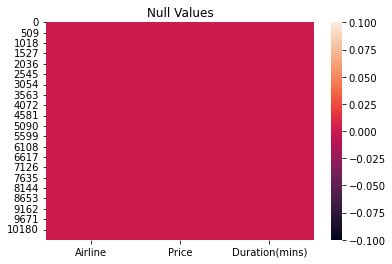

In [49]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [50]:
# Checking The NULL values in the dataset
df.isnull().sum().sum()

0

Therefore there is no null values in the dataset

Checking  Correlation

In [51]:
df.corr()

,Airline,Price,Duration(mins)
Airline,1.000000,-0.039520,-0.090101
Price,-0.039520,1.000000,0.449471
Duration(mins),-0.090101,0.449471,1.000000


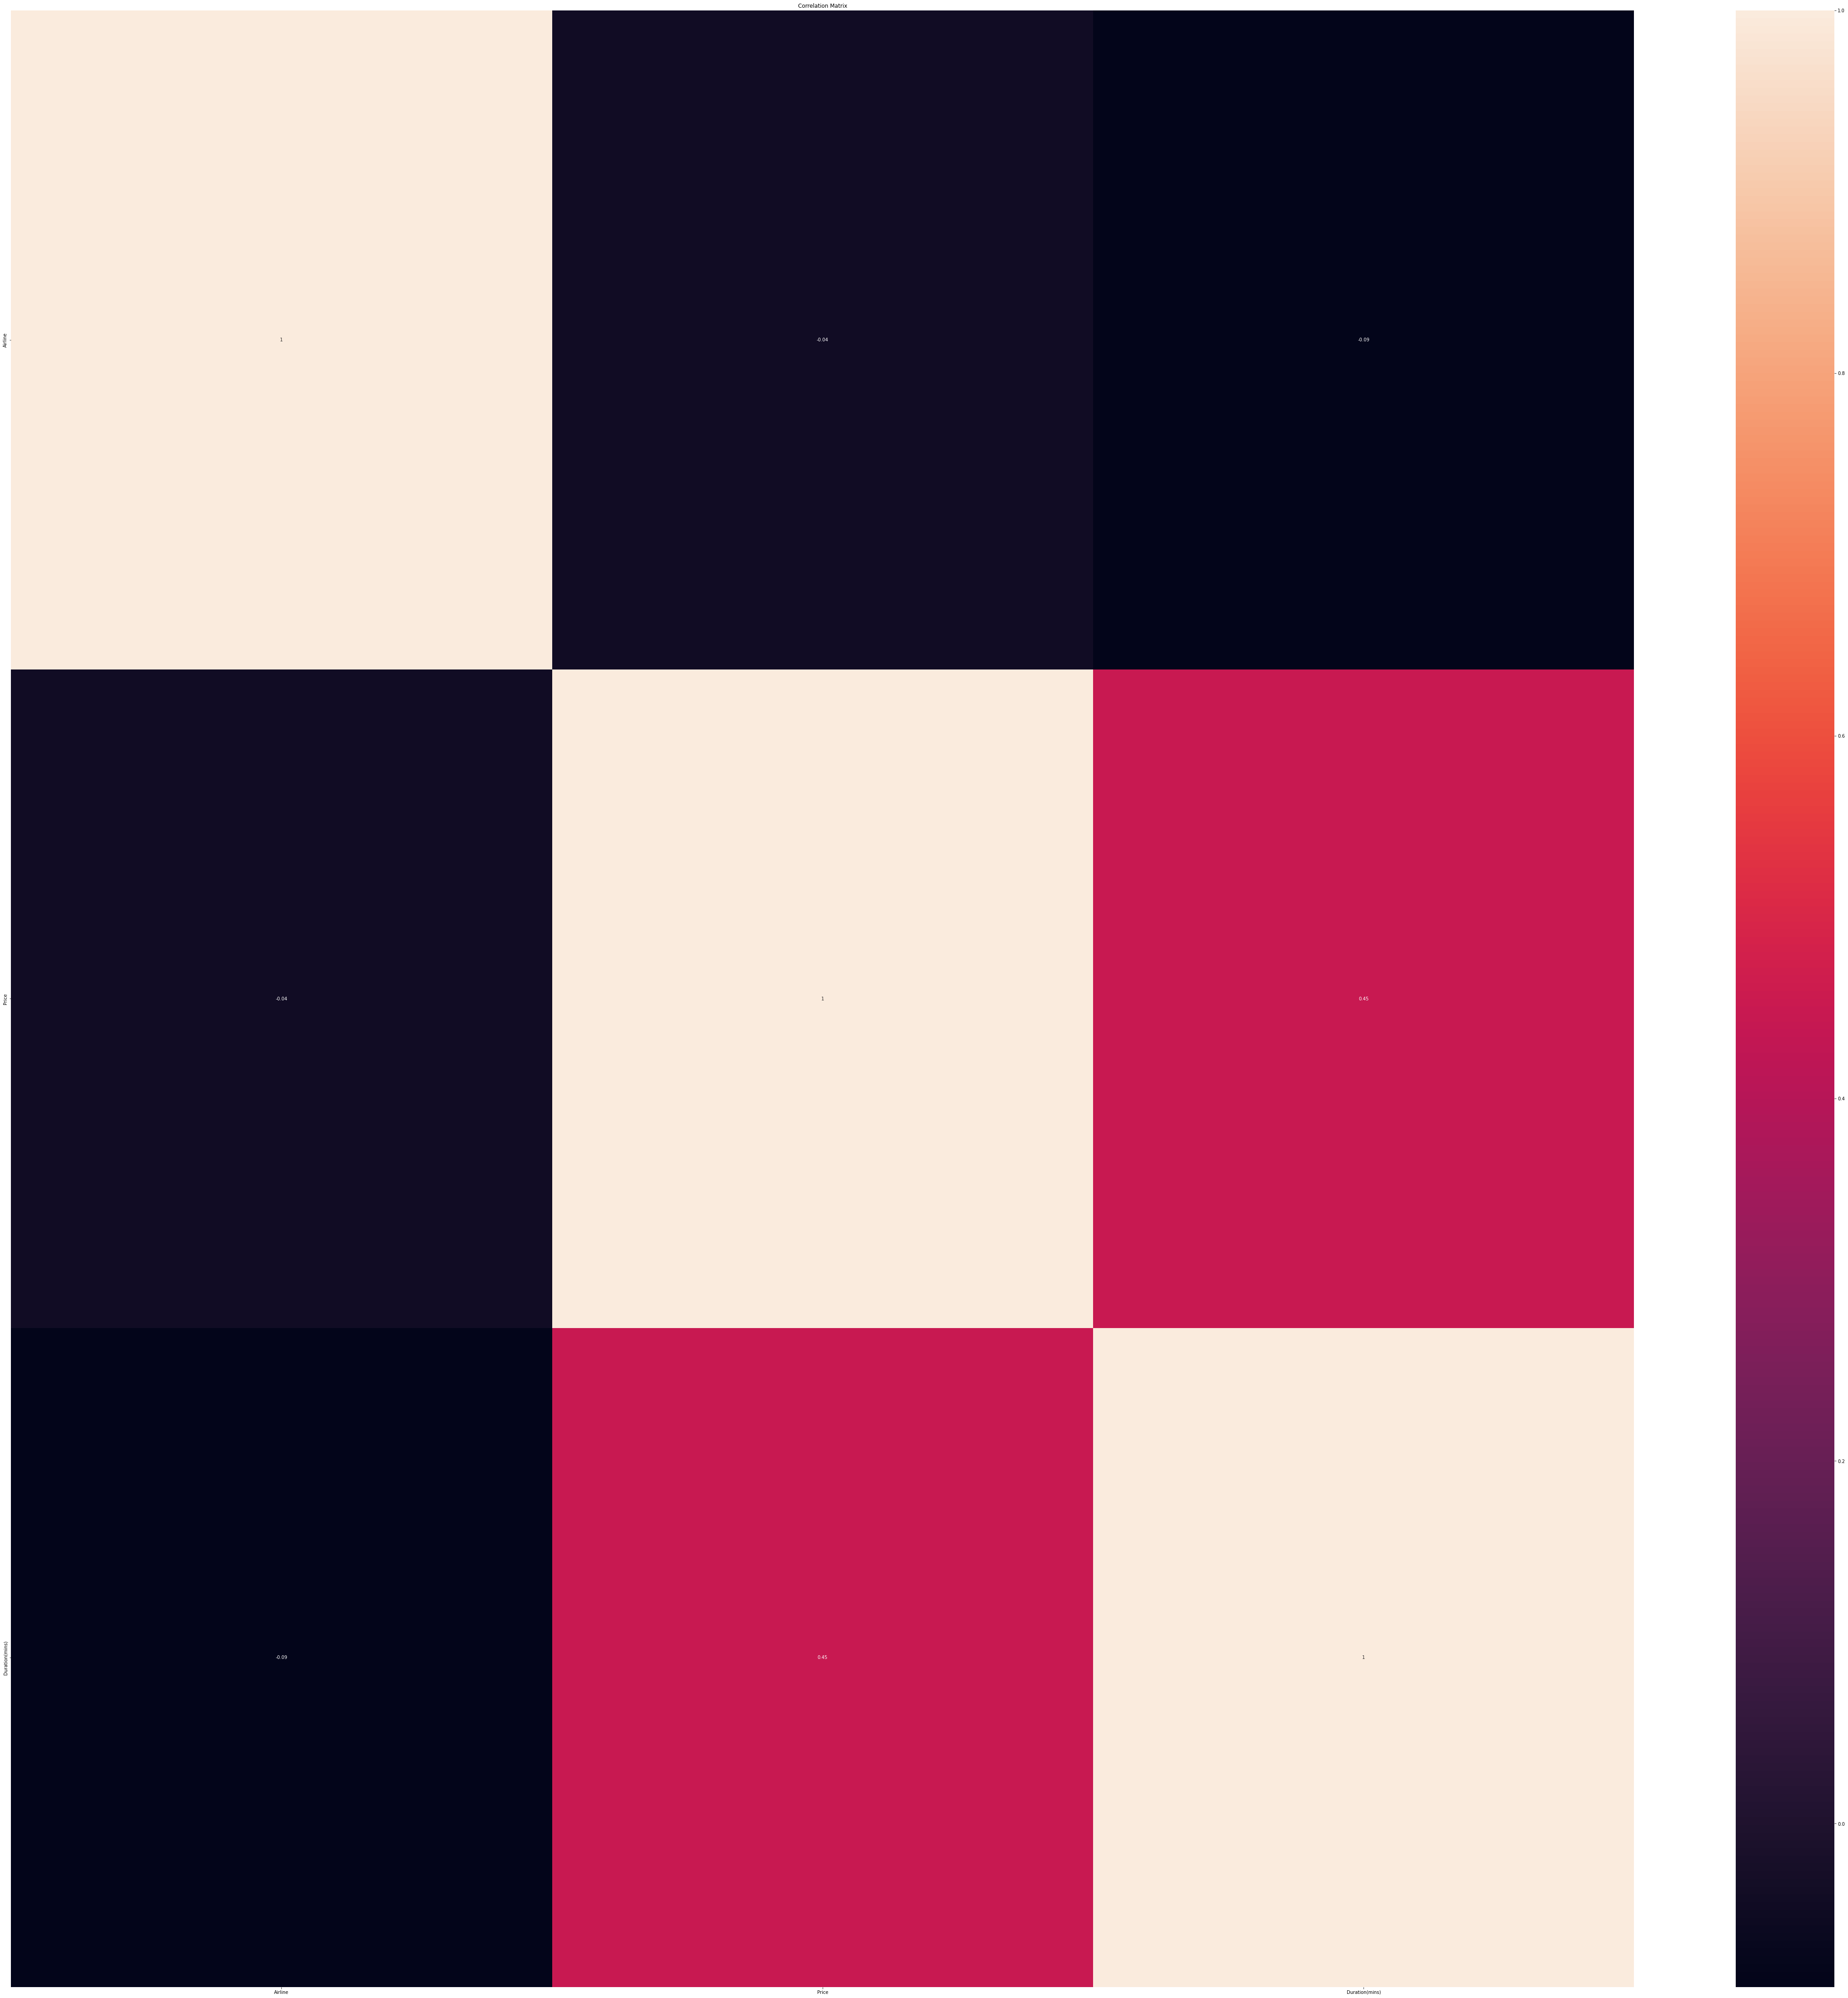

In [52]:
corr_mat=df.corr()
# Size of the canvas
plt.figure(figsize=[80,80])
# Plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Flight Price correlation matrix.jpg')
plt.show()

In [54]:
corr_matrix=df.corr()

In [55]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [56]:
corr_matrix=df.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price             1.000000
Duration(mins)    0.449471
Airline          -0.039520
Name: Price, dtype: float64

There is a strong positive correlation between Duration and Price and weak correlation between Airline and Price

Let's Check the data distribution among the columns

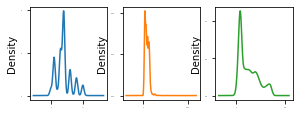

In [57]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

We can see skewness in data for multiple columns will handle the skewness in further steps

Splitting the independent and target variables in x and y before remooving the skewness

In [58]:
x=df.drop('Price',axis=1)
y=df['Price']

In [59]:
x.shape , y.shape

((10683, 2), (10683,))

In [60]:
# Checking Skewness
x.skew().sort_values(ascending=False)

Duration(mins)    0.830148
Airline           0.731095
dtype: float64

In [62]:
from sklearn.preprocessing import power_transform

In [63]:
x_new=power_transform(x)

In [64]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

0   -0.015312
1   -0.037173
dtype: float64

In [65]:
type(x_new)

numpy.ndarray

In [66]:
x.columns

Index(['Airline', 'Duration(mins)'], dtype='object')

In [67]:
x=pd.DataFrame(x_new,columns=x.columns)

In [68]:
x

,Airline,Duration(mins)
0,-0.295500,-0.830511
1,-1.420300,0.187783
2,0.147745,1.432383
3,-0.295500,-0.170462
4,-0.295500,-0.312514
...,...,...
10678,-2.244150,-0.946733
10679,-1.420300,-0.916619
10680,0.147745,-0.776275
10681,2.122896,-0.887237


In [69]:
x.skew().sort_values(ascending=False)

Airline          -0.015312
Duration(mins)   -0.037173
dtype: float64

In [70]:
sk=x.skew()

In [71]:
sk

Airline          -0.015312
Duration(mins)   -0.037173
dtype: float64

In [72]:
sk[np.abs(sk)>0.5].all()

True

In [73]:
sk[np.abs(sk)>0.5]

Series([], dtype: float64)

In [74]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Skewness has been removed,now we can proceed with further steps

# Checking Outliers

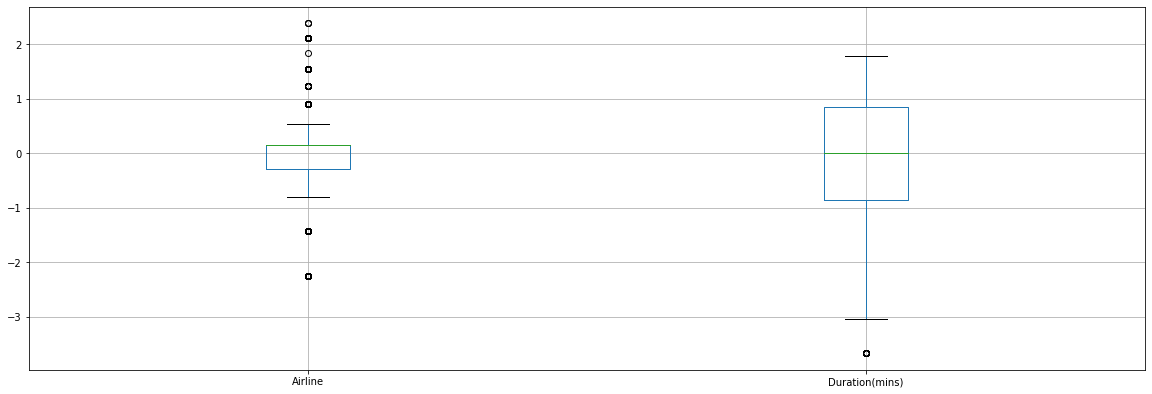

In [75]:
x.iloc[:,0:3].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [76]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

Airline            True
Duration(mins)    False
dtype: bool

Remove Outliers

In [78]:
feature=['Airline', 'Duration(mins)']

In [77]:
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    ls=df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]
    return ls

In [79]:
index_list=[]
for i in feature:
    index_list.extend(outliers(df,i))

In [80]:
index_list

[1,
 5,
 9,
 10,
 12,
 15,
 16,
 18,
 21,
 28,
 29,
 30,
 31,
 36,
 37,
 40,
 41,
 43,
 44,
 45,
 47,
 48,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 67,
 68,
 72,
 75,
 79,
 84,
 90,
 91,
 93,
 94,
 96,
 103,
 104,
 106,
 107,
 108,
 112,
 115,
 116,
 117,
 118,
 120,
 121,
 123,
 125,
 130,
 132,
 134,
 137,
 140,
 144,
 147,
 149,
 150,
 155,
 162,
 164,
 166,
 167,
 171,
 173,
 177,
 179,
 182,
 185,
 189,
 191,
 195,
 198,
 199,
 201,
 203,
 204,
 207,
 211,
 212,
 213,
 216,
 219,
 220,
 221,
 223,
 225,
 228,
 230,
 231,
 232,
 235,
 237,
 239,
 242,
 243,
 244,
 248,
 249,
 250,
 251,
 253,
 254,
 255,
 256,
 264,
 265,
 267,
 268,
 271,
 272,
 273,
 274,
 276,
 277,
 278,
 281,
 285,
 289,
 291,
 293,
 297,
 298,
 299,
 301,
 302,
 307,
 308,
 309,
 315,
 316,
 317,
 322,
 327,
 329,
 330,
 334,
 335,
 338,
 341,
 343,
 344,
 348,
 353,
 357,
 361,
 362,
 363,
 365,
 366,
 368,
 370,
 371,
 373,
 375,
 376,
 378,
 380,
 383,
 384,
 385,
 387,
 391,
 392,
 395,
 396,
 3

In [81]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [82]:
df_cleaned=remove(df,index_list)

In [83]:
df_cleaned.shape

(6102, 3)

Now we are splitting x and y from df_cleaned

In [85]:
x=df_cleaned.drop('Price',axis=1)
y=df_cleaned['Price']

In [86]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

Airline           True
Duration(mins)    True
dtype: bool

Therefore we removed outliers successfully

Feature Scaling

In [100]:
y=y.values.reshape(-1,1)

In [101]:
from sklearn.preprocessing import StandardScaler
scaler_x=StandardScaler()
scaler_y=StandardScaler()
x=scaler_x.fit_transform(x)
y=scaler_y.fit_transform(y.reshape(-1,1))

In [103]:
df2=pd.DataFrame(data=x,columns=['Airline','Duration(mins)'])

In [104]:
df3=pd.DataFrame(data=y,columns=['Price'])

In [105]:
df_new=pd.concat([df2,df3],axis=1)

In [106]:
df_new

,Airline,Duration(mins),Price
0,-1.087506,-0.838346,-1.140826
1,0.722137,1.600924,0.893186
2,-1.087506,-0.448566,-0.668023
3,-1.087506,-0.549155,0.775036
4,0.722137,1.072834,0.323826
...,...,...,...
6097,0.722137,-0.159374,2.387783
6098,0.722137,1.739233,0.336659
6099,0.722137,0.997393,1.468047
6100,0.722137,-1.152685,0.323826


In [107]:
x=df_new.drop('Price',axis=1)
y=df_new['Price']

# Training Process begin

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [110]:
x_train.shape , x_test.shape

((4881, 2), (1221, 2))

In [111]:
y_train.shape , y_test.shape

((4881,), (1221,))

In [112]:
lr=LinearRegression()

In [113]:
lr.fit(x_train,y_train)

LinearRegression()

In [114]:
coeff_df=pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Airline,0.465957
Duration(mins),0.262416


In [115]:
lr.intercept_

-0.007512004131685247

To make Predictions on test data

In [120]:
y_pred1=lr.predict(x_test)

In [123]:
comp_df=pd.DataFrame({'Actual Price':y_test,'Predicted Sales':y_pred1})

In [124]:
comp_df

,Actual Price,Predicted Sales
1242,-0.757246,-0.737538
2941,-0.859711,-0.754036
3803,-1.225772,-0.671548
1513,-0.759487,0.115577
3502,0.809055,0.524715
...,...,...
5568,0.879945,0.610502
1102,0.996262,0.033089
329,-0.462075,0.115577
3862,0.947983,0.257455


In [125]:
print('Errors:')
print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))

Errors:
Mean Squared Error : 0.7019380002085817
Mean Absolute Error : 0.5375098941804062
Root Mean Squared Error: 0.8378174026651521


Random Forest Regressor Model

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)

In [130]:
y_pred2

array([-0.99180052, -1.03705551, -0.98732395, ..., -0.43596847,
        0.77890973,  0.54467363])

In [131]:
print('Errors:')
print('Mean Squared Error :',mean_squared_error(y_test,y_pred2))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred2))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred2)))

Errors:
Mean Squared Error : 0.4305150973195652
Mean Absolute Error : 0.4187958484545945
Root Mean Squared Error: 0.6561364929033937


In [132]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
dt=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=1)

In [134]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=1)

In [135]:
y_pred3=dt.predict(x_test)

In [136]:
print('Errors:')
print('Mean Squared Error :',mean_squared_error(y_test,y_pred3))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred3))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred3)))

Errors:
Mean Squared Error : 0.6345560596553789
Mean Absolute Error : 0.47305007495532825
Root Mean Squared Error: 0.7965902708766778


In [137]:
from sklearn.svm import SVR

In [138]:
svr=SVR()

In [139]:
svr.fit(x_train,y_train)

SVR()

In [140]:
y_pred4=svr.predict(x_test)

In [141]:
print('Errors:')
print('Mean Squared Error :',mean_squared_error(y_test,y_pred4))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred4))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred4)))

Errors:
Mean Squared Error : 0.5632976651055783
Mean Absolute Error : 0.4569602563910138
Root Mean Squared Error: 0.7505315883462723
